# <font color=#025dfa> Hava Trafik Yolcu İstatistikleri

In [2]:
#pip install yellowbrick

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore') 

from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn import datasets

In [4]:
df=pd.read_csv('air-traffic-passenger-statistics.csv')

## <font color=#d707f2> EDA Exploratory Data Analsis

In [6]:
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [7]:
df.sample(5)

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
10906,201305,Alaska Airlines,AS,Alaska Airlines,AS,Domestic,US,Deplaned,Other,International,A,2710
16980,201706,Jazz Aviation,QK,Air Canada,AC,International,Canada,Deplaned,Other,International,G,3557
8833,201110,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,International,Canada,Enplaned,Other,Terminal 3,F,15088
11529,201310,LAN Peru,LP,LAN Peru,LP,International,South America,Enplaned,Other,International,A,2902
392,200510,EVA Airways,BR,EVA Airways,BR,International,Asia,Deplaned,Other,International,G,10122


In [8]:
df.tail()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
18880,201806,WOW Air,WW,WOW Air,WW,International,Europe,Enplaned,Other,International,G,50
18881,201806,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Deplaned,Other,International,A,10868
18882,201806,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Enplaned,Other,International,A,11664
18883,201806,XL Airways France,SE,XL Airways France,SE,International,Europe,Deplaned,Other,International,A,804
18884,201806,XL Airways France,SE,XL Airways France,SE,International,Europe,Enplaned,Other,International,A,1243


In [9]:
df.shape

(18885, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              18885 non-null  int64 
 1   Operating Airline            18885 non-null  object
 2   Operating Airline IATA Code  18822 non-null  object
 3   Published Airline            18885 non-null  object
 4   Published Airline IATA Code  18822 non-null  object
 5   GEO Summary                  18885 non-null  object
 6   GEO Region                   18885 non-null  object
 7   Activity Type Code           18885 non-null  object
 8   Price Category Code          18885 non-null  object
 9   Terminal                     18885 non-null  object
 10  Boarding Area                18885 non-null  object
 11  Passenger Count              18885 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1.7+ MB


In [11]:
df.describe()

,Activity Period,Passenger Count
count,18885.000000,18885.000000
mean,201179.285994,29876.744400
std,385.755460,60626.072969
min,200507.000000,1.000000
25%,200811.000000,5352.000000
50%,201204.000000,9170.000000
75%,201509.000000,20718.000000
max,201806.000000,659837.000000


In [12]:
df.isnull().sum().sort_values(ascending=False)

Operating Airline IATA Code    63
Published Airline IATA Code    63
Activity Period                 0
Operating Airline               0
Published Airline               0
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
dtype: int64

## <font color=#e82709> Feature Engineering

### <font color='#0975e8'> Boşluk Varsa Doldurmaya, Düzeltilecek Kısım Varsa Düzetmaye Başladık

In [15]:
df.isnull().sum().sort_values(ascending=False)

Operating Airline IATA Code    63
Published Airline IATA Code    63
Activity Period                 0
Operating Airline               0
Published Airline               0
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
dtype: int64

sns.countplot(x=df[])
plt.xticks(rotation=90);

df[].value_counts().plot.pie(autopct='%1.1f%%',explode=[,,,]);

sns.distplot(x=df[])
plt.xticks(rotation=90);

sns.histplot(x=df[]);

sns.boxplot(x='',y='',data=df);
plt.xticks(rotation=90);

#### <font color=#2da6f7> Activity Period İlgileniyoruz

In [19]:
df['Activity Period'].value_counts()

Activity Period
201806    170
201805    165
201708    156
201709    154
201706    153
         ... 
201302    110
201407    109
201303    108
200602    108
201301    107
Name: count, Length: 156, dtype: int64

In [20]:
df['Activity Period']=df['Activity Period'].astype(str)
df['year']=df['Activity Period'].str[:4] # 4.cü(4'cü dahil) kadar ilk 5 veriyi alıyoruz
df.head(1)

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,year
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,2005


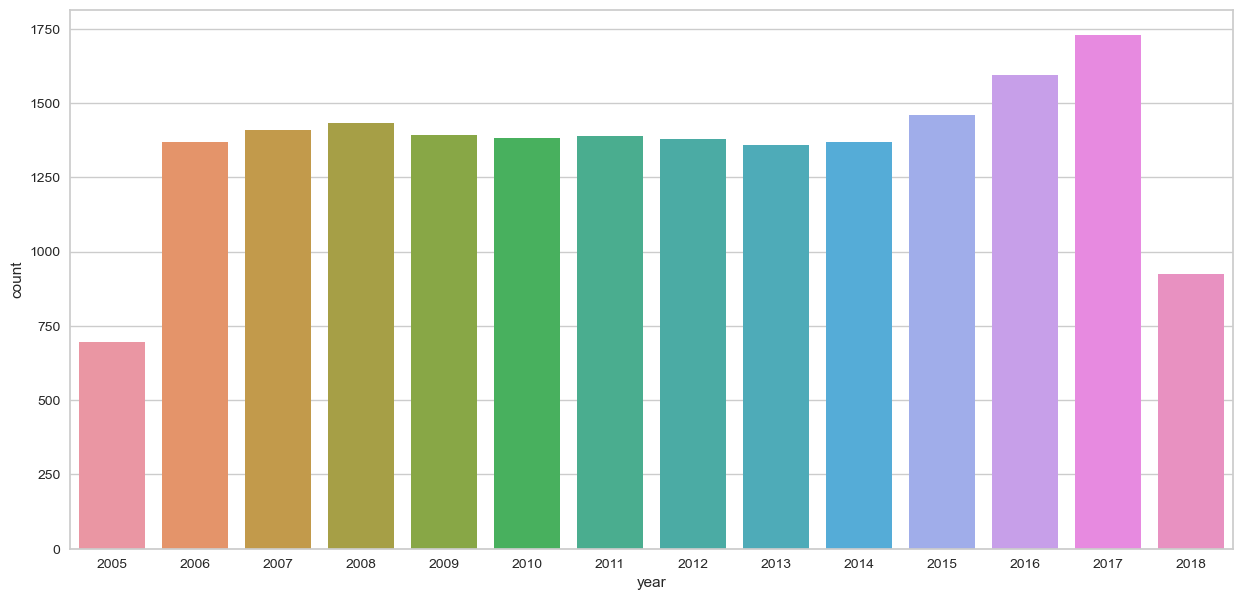

In [21]:
plt.figure(figsize=(15,7))
sns.countplot(x=df['year']);

#### <font color=#2da6f7> Operating Airline IATA Code İlgileniyoruz

In [23]:
df['Operating Airline IATA Code'].value_counts()

Operating Airline IATA Code
UA    3807
OO    1212
AS     891
VX     462
DL     445
      ... 
IB       6
WO       3
XP       2
5Y       2
EZ       2
Name: count, Length: 82, dtype: int64

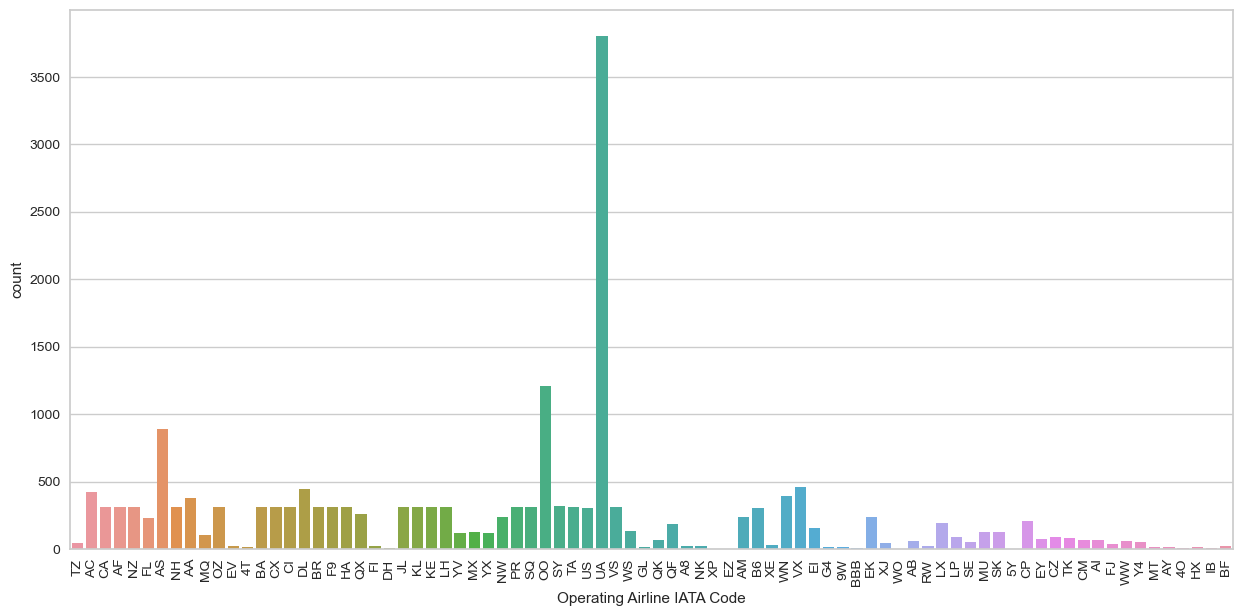

In [24]:
plt.figure(figsize=(15,7))
sns.countplot(x=df['Operating Airline IATA Code'])
plt.xticks(rotation=90);

#### <font color=#2da6f7> Published Airline IATA Code İlgileniyoruz

In [26]:
df['Published Airline IATA Code'].value_counts()

Published Airline IATA Code
UA     4649
AS     1203
DL      975
AA      588
AC      484
       ... 
BBB       6
WO        3
EZ        2
XP        2
5Y        2
Name: count, Length: 73, dtype: int64

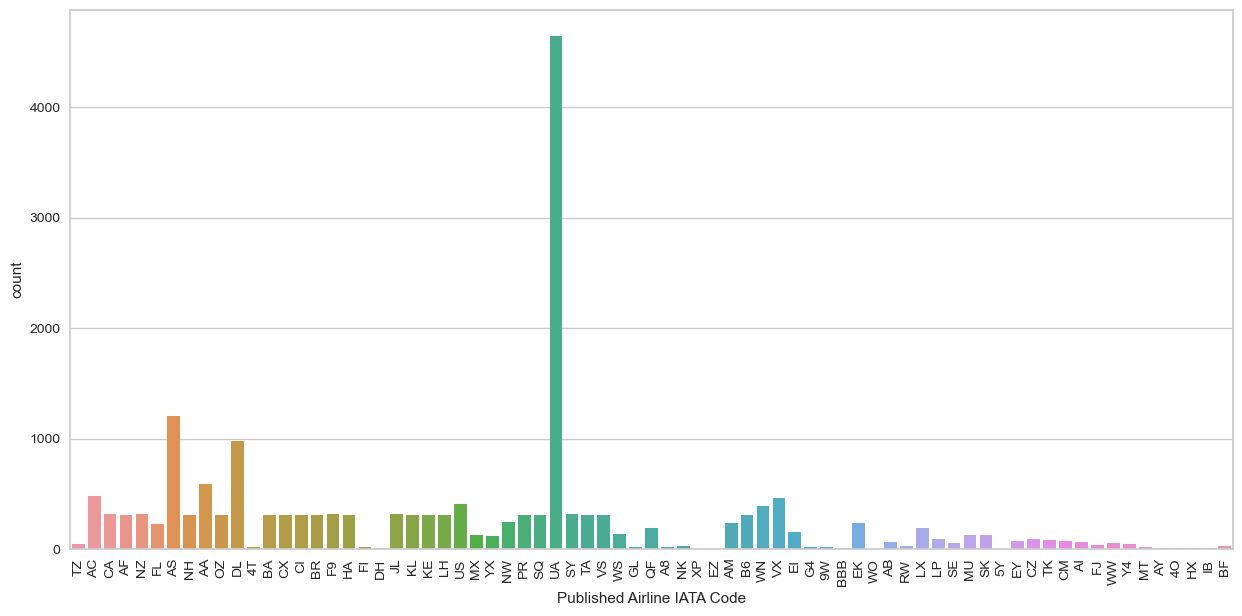

In [27]:
plt.figure(figsize=(15,7))
sns.countplot(x=df['Published Airline IATA Code'])
plt.xticks(rotation=90);

#### <font color=#2da6f7> Operating Airline İlgileniyoruz

In [29]:
df['Operating Airline'].value_counts()

Operating Airline
United Airlines - Pre 07/01/2013    2154
United Airlines                     1653
SkyWest Airlines                    1212
Alaska Airlines                      891
Virgin America                       462
                                    ... 
Xtra Airways                           2
Evergreen International Airlines       2
Pacific Aviation                       2
Icelandair EHF                         2
Boeing Company                         1
Name: count, Length: 89, dtype: int64

In [30]:
df['Operating Airline']=df['Operating Airline'].replace('United Airlines - Pre 07/01/2013','United Airlines')

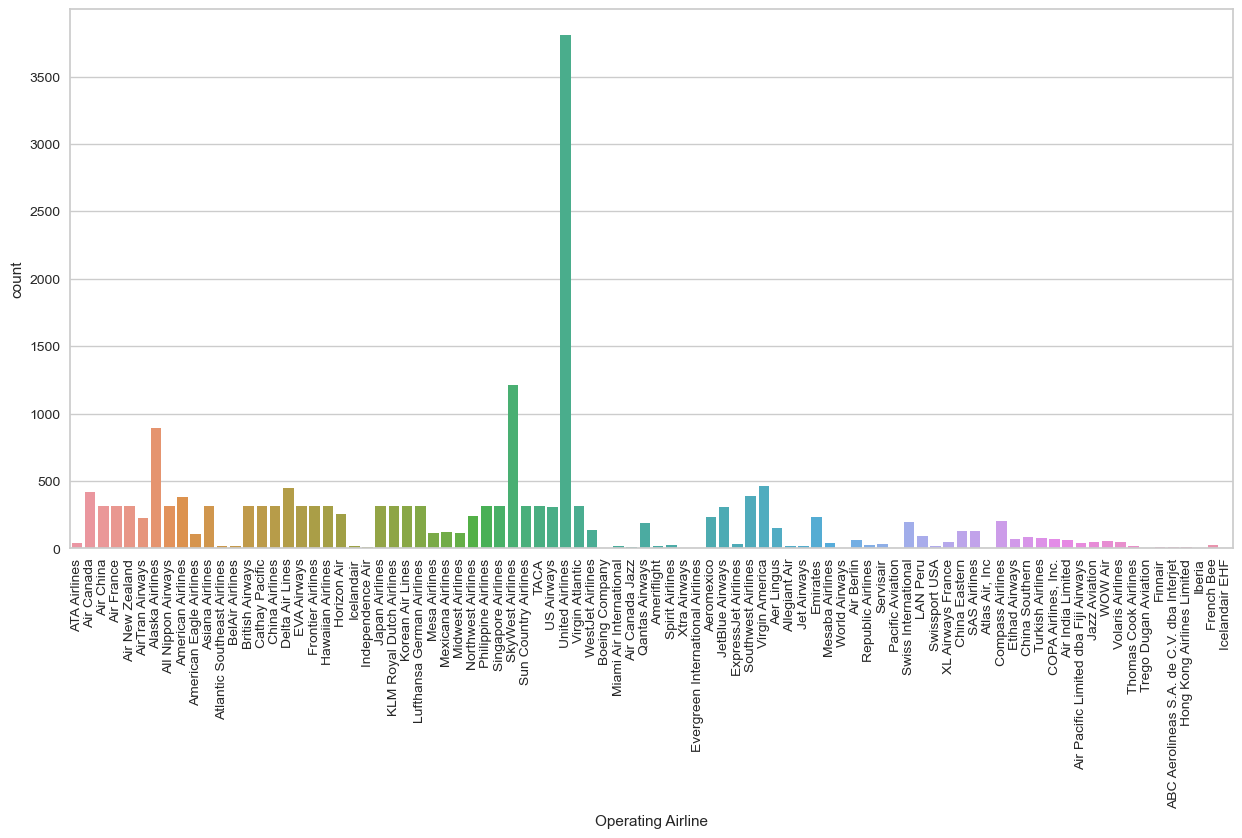

In [31]:
plt.figure(figsize=(15,7))
sns.countplot(x=df['Operating Airline'])
plt.xticks(rotation=90);

#### <font color=#2da6f7> Published Airline İlgileniyoruz

In [33]:
df['Published Airline'].value_counts()

Published Airline
United Airlines - Pre 07/01/2013    2645
United Airlines                     2004
Alaska Airlines                     1203
Delta Air Lines                      975
American Airlines                    588
                                    ... 
Trego Dugan Aviation                   2
Evergreen International Airlines       2
Atlas Air, Inc                         2
Icelandair EHF                         2
Boeing Company                         1
Name: count, Length: 79, dtype: int64

In [34]:
df['Published Airline']=df['Published Airline'].replace('United Airlines - Pre 07/01/2013','United Airlines')

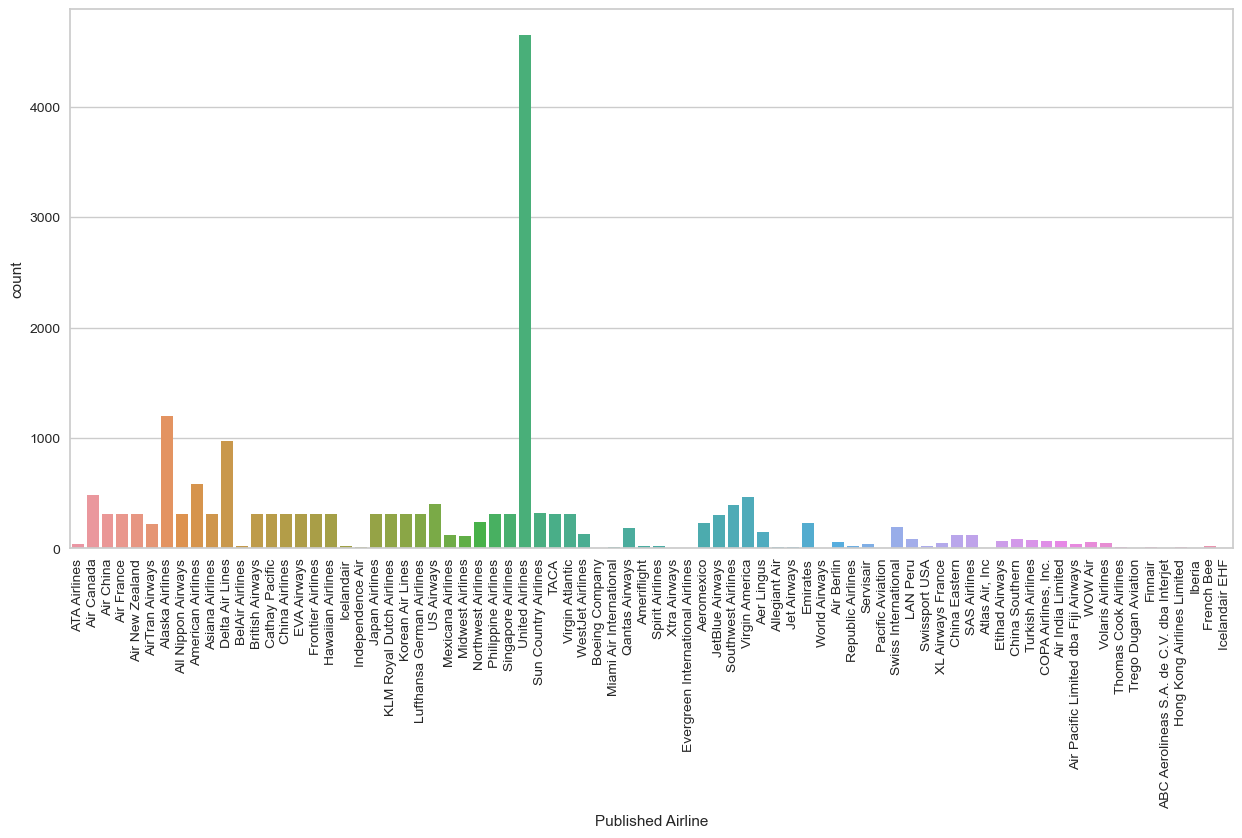

In [35]:
plt.figure(figsize=(15,7))
sns.countplot(x=df['Published Airline'])
plt.xticks(rotation=90);

#### <font color=#2da6f7> GEO Summary İlgileniyoruz

In [37]:
df['GEO Summary'].value_counts()

GEO Summary
International    11904
Domestic          6981
Name: count, dtype: int64

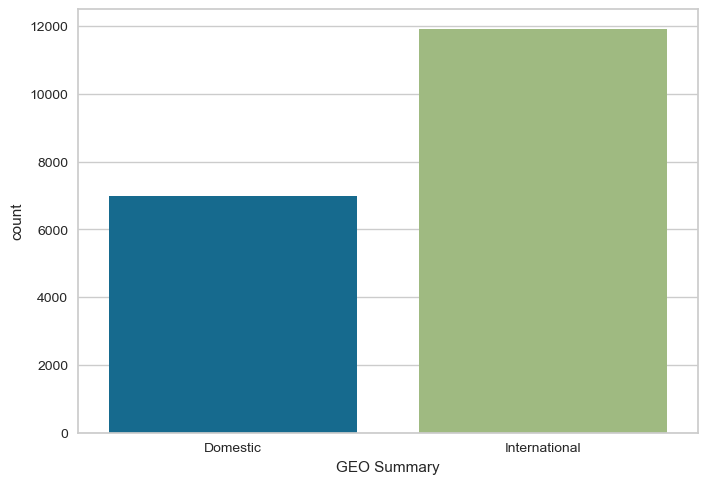

In [38]:
sns.countplot(x=df['GEO Summary']);

#### <font color=#2da6f7> GEO Region İlgileniyoruz

In [40]:
df['GEO Region'].value_counts()

GEO Region
US                     6981
Asia                   4073
Europe                 2803
Canada                 1794
Mexico                 1455
Australia / Oceania     951
Central America         383
Middle East             354
South America            91
Name: count, dtype: int64

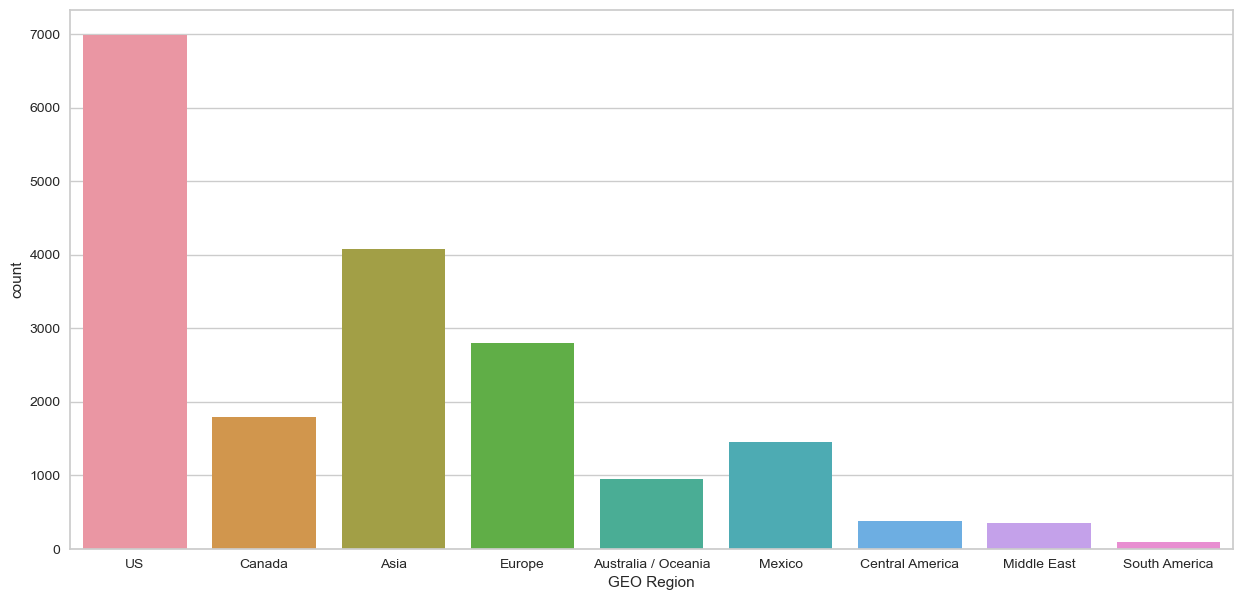

In [41]:
plt.figure(figsize=(15,7))
sns.countplot(x=df['GEO Region']);

#### <font color=#2da6f7> Activity Type Code İlgileniyoruz

In [43]:
df['Activity Type Code'].value_counts()

Activity Type Code
Enplaned          8930
Deplaned          8909
Thru / Transit    1046
Name: count, dtype: int64

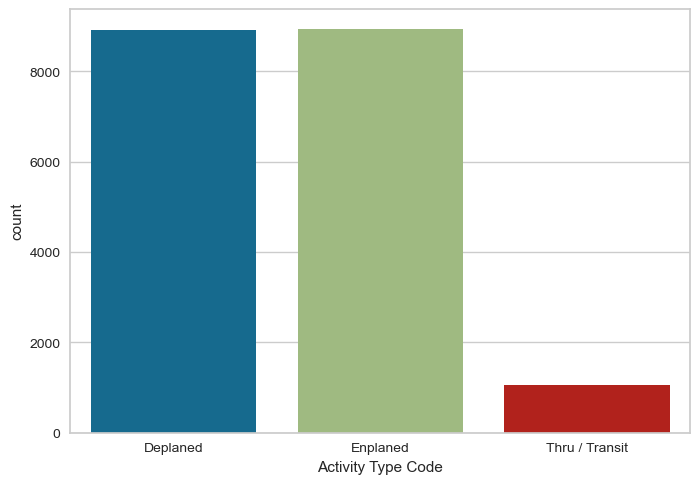

In [44]:
sns.countplot(x=df['Activity Type Code']);

#### <font color=#2da6f7> Price Category Code İlgileniyoruz

In [46]:
df['Price Category Code'].value_counts()

Price Category Code
Other       16521
Low Fare     2364
Name: count, dtype: int64

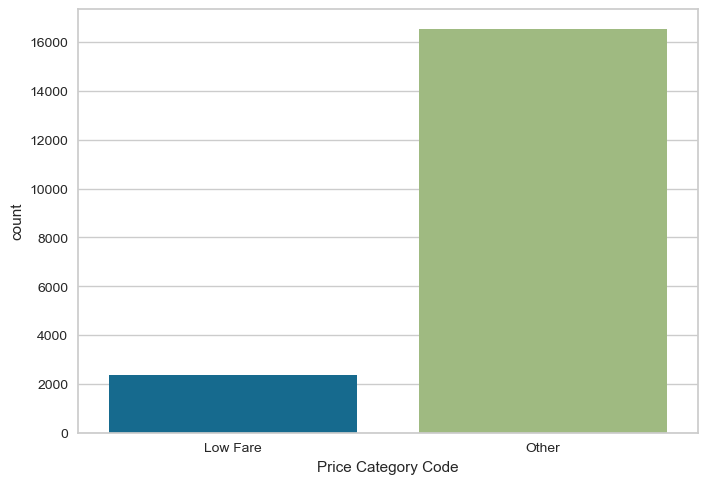

In [47]:
sns.countplot(x=df['Price Category Code']);

#### <font color=#2da6f7> Terminal İlgileniyoruz

In [49]:
df['Terminal'].value_counts()

Terminal
International    11963
Terminal 1        3610
Terminal 3        2699
Terminal 2         586
Other               27
Name: count, dtype: int64

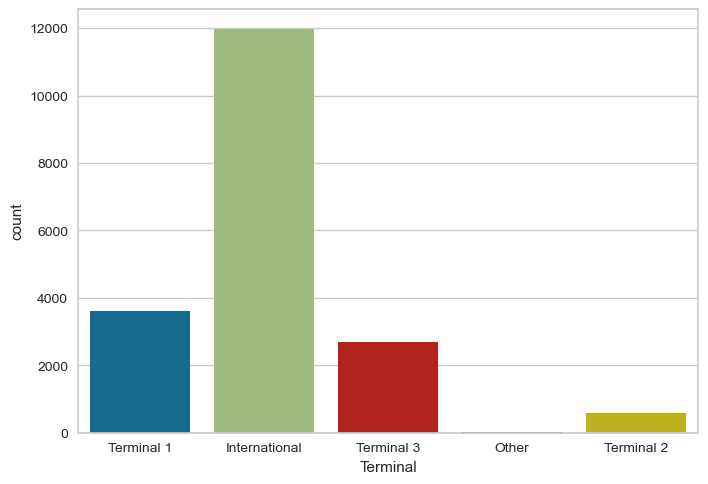

In [50]:
sns.countplot(x=df['Terminal']);

#### <font color=#2da6f7> Boarding Area İlgileniyoruz

In [52]:
df['Boarding Area'].value_counts()

Boarding Area
A        6679
G        5304
B        2128
F        1682
C        1462
E        1017
D         586
Other      27
Name: count, dtype: int64

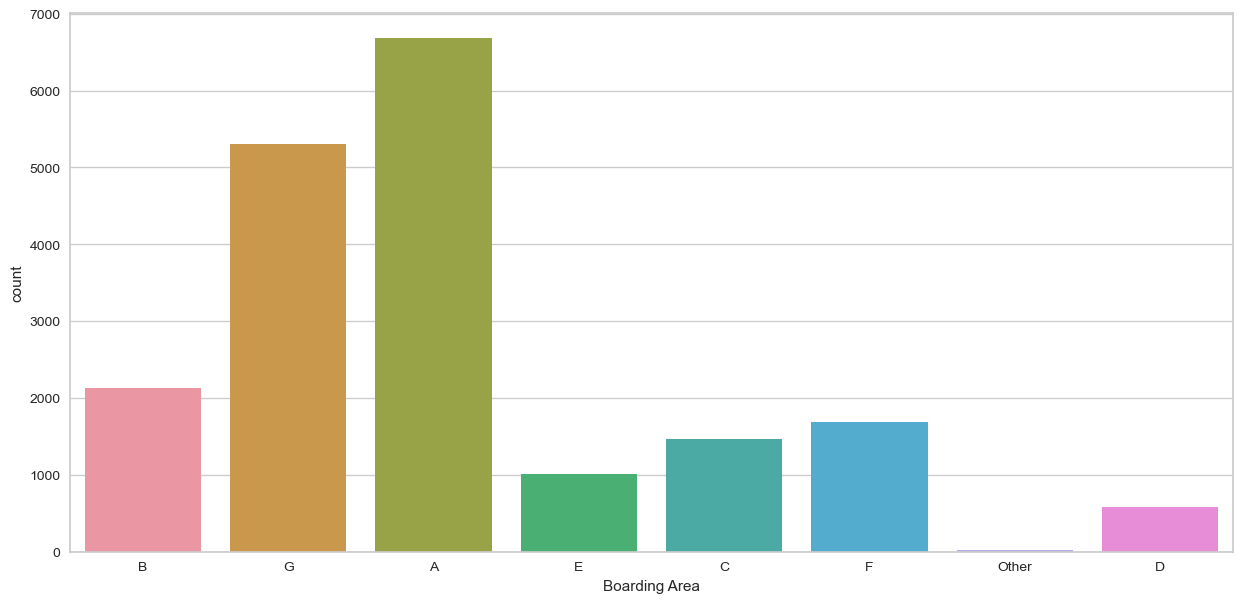

In [53]:
plt.figure(figsize=(15,7))
sns.countplot(x=df['Boarding Area']);

#### <font color=#2da6f7> Passenger Count İlgileniyoruz

In [55]:
df['Passenger Count'].value_counts()

Passenger Count
1         15
10        12
2         12
4         11
40         9
          ..
104094     1
3166       1
1337       1
972        1
11664      1
Name: count, Length: 13970, dtype: int64

In [56]:
df=df.drop(['Activity Period','Published Airline','Operating Airline IATA Code','Published Airline IATA Code','Terminal','Boarding Area'], axis=1)

In [57]:
df.isnull().sum().sort_values(ascending=False)

Operating Airline      0
GEO Summary            0
GEO Region             0
Activity Type Code     0
Price Category Code    0
Passenger Count        0
year                   0
dtype: int64

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Operating Airline    18885 non-null  object
 1   GEO Summary          18885 non-null  object
 2   GEO Region           18885 non-null  object
 3   Activity Type Code   18885 non-null  object
 4   Price Category Code  18885 non-null  object
 5   Passenger Count      18885 non-null  int64 
 6   year                 18885 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.0+ MB


In [59]:
df.sample(5)

,Operating Airline,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Passenger Count,year
10327,United Airlines,International,Canada,Enplaned,Other,8832,2012
6882,Asiana Airlines,International,Asia,Deplaned,Other,4837,2010
1457,United Airlines,Domestic,US,Deplaned,Other,395122,2006
4913,Air France,International,Europe,Enplaned,Other,6983,2009
14983,United Airlines,Domestic,US,Enplaned,Other,319873,2016


## <font color=#fa7efc> Kümeleme/Clustering

In [61]:
d={'Domestic':0,'International':1}

In [62]:
df['GEO Summary']=df['GEO Summary'].map(d)

In [63]:
d2={'Low Fare':0,'Other':1}

In [64]:
df['Price Category Code']=df['Price Category Code'].map(d2)

In [66]:
df1=pd.get_dummies(df,drop_first=True)

In [68]:
df.head()

,Operating Airline,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Passenger Count,year
0,ATA Airlines,0,US,Deplaned,0,27271,2005
1,ATA Airlines,0,US,Enplaned,0,29131,2005
2,ATA Airlines,0,US,Thru / Transit,0,5415,2005
3,Air Canada,1,Canada,Deplaned,1,35156,2005
4,Air Canada,1,Canada,Enplaned,1,34090,2005


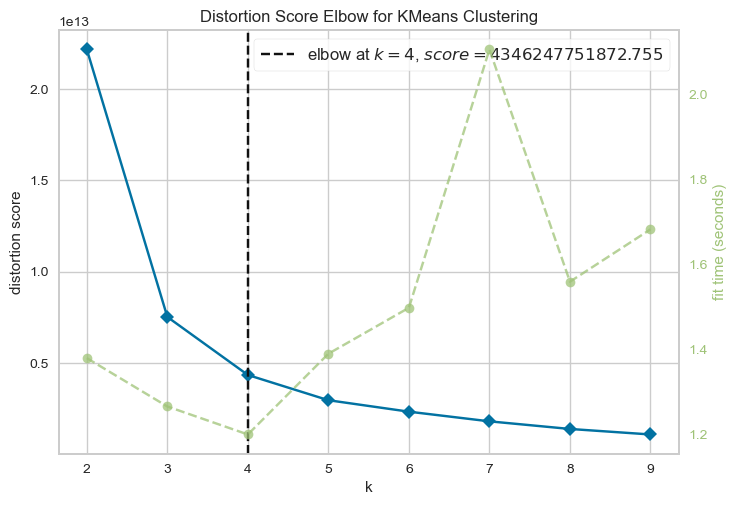

In [75]:
km = KMeans()
#KMeans(x) 0'dan başlayıp x'e(x dahil değil) kadar sayıları alıyor
visualizer = KElbowVisualizer(km, k=(2,10))
visualizer.fit(df1)
visualizer.show();

In [77]:
model=KMeans(random_state=42)

In [81]:
model=model.fit(df1)
tahmin=model.predict(df1)
tahmin

array([6, 6, 0, ..., 0, 0, 0])

In [83]:
df['Cluster']=tahmin

In [85]:
df.head()

,Operating Airline,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Passenger Count,year,Cluster
0,ATA Airlines,0,US,Deplaned,0,27271,2005,6
1,ATA Airlines,0,US,Enplaned,0,29131,2005,6
2,ATA Airlines,0,US,Thru / Transit,0,5415,2005,0
3,Air Canada,1,Canada,Deplaned,1,35156,2005,6
4,Air Canada,1,Canada,Enplaned,1,34090,2005,6


In [89]:
silhouette_score(df1,tahmin)

0.6462111606341797

## <font color=#0d613b> SONUÇ

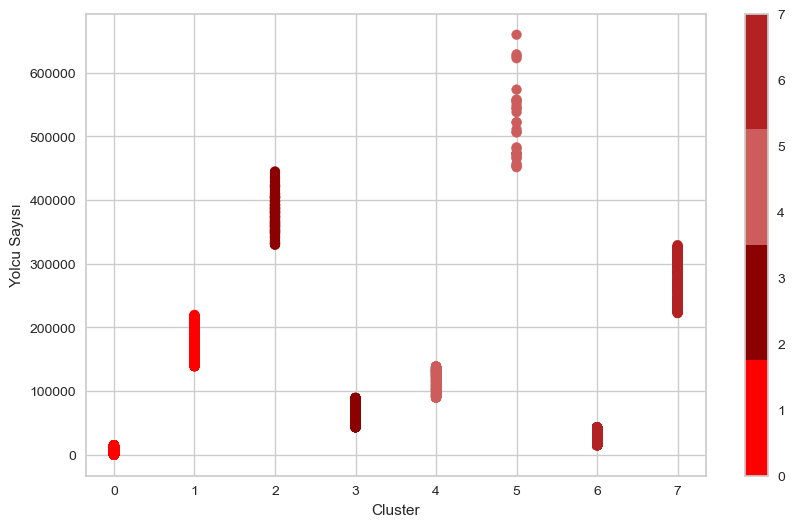

In [91]:
renkler = ['red', 'darkred', 'indianred', 'firebrick']
cmap = ListedColormap(renkler)
plt.figure(figsize=(10,6))
plt.scatter(df['Cluster'], df['Passenger Count'], c=tahmin, cmap=cmap)
plt.colorbar()
plt.xlabel('Cluster')
plt.ylabel('Yolcu Sayısı');

In [93]:
#Uçuş sayısına göre kümelendiriyoruz

In [95]:
flight_counts = df.groupby('Operating Airline').size().reset_index(name='Flight Count')

In [97]:
df=df.merge(flight_counts, on ='Operating Airline', how='left')
#merge ile iki sütünü birleştirdik

In [99]:
df

,Operating Airline,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Passenger Count,year,Cluster,Flight Count
0,ATA Airlines,0,US,Deplaned,0,27271,2005,6,44
1,ATA Airlines,0,US,Enplaned,0,29131,2005,6,44
2,ATA Airlines,0,US,Thru / Transit,0,5415,2005,0,44
3,Air Canada,1,Canada,Deplaned,1,35156,2005,6,420
4,Air Canada,1,Canada,Enplaned,1,34090,2005,6,420
...,...,...,...,...,...,...,...,...,...
18880,WOW Air,1,Europe,Enplaned,1,50,2018,0,56
18881,WestJet Airlines,1,Canada,Deplaned,1,10868,2018,0,135
18882,WestJet Airlines,1,Canada,Enplaned,1,11664,2018,0,135
18883,XL Airways France,1,Europe,Deplaned,1,804,2018,0,51


In [101]:
df2=df.drop(['Cluster'],axis=1)

In [103]:
df2=pd.get_dummies(df2,drop_first=True)

In [105]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [107]:
model1=KMeans(random_state=42)

In [109]:
model1=model1.fit((flight_counts[['Flight Count']]))
tahmin1=model1.predict((flight_counts[['Flight Count']]))
tahmin1

KeyError: "None of [Index(['Flight Count'], dtype='object')] are in the [columns]"

In [ ]:
flight_counts['Cluster']=tahmin1

In [ ]:
flight_counts['Cluster'].value_counts()

In [ ]:
df2.head()

In [ ]:
silhouette_score(flight_counts[['Flight Count']], tahmin1)

In [ ]:
plt.figure(figsize=(14, 10))
plt.scatter(flight_counts['Operating Airline'], flight_counts['Flight Count'], c=flight_counts['Cluster'])
plt.xlabel('Operating Airline')
plt.ylabel('Uçuş sayısı')
plt.title('Flight Count by Operating Airline')
plt.xticks(rotation=90)
plt.colorbar(label='Cluster')
plt.show()

### <font color=#b798fa> Hierachical Clustering

In [ ]:
data=linkage(df,method='ward', metric='euclidean')

In [ ]:
plt.figure(figsize=(25,6))
dendrogram(data);